## WE11- Auto Encoder

#### Srikar Pusuluri

## Importing the required libraries

In [16]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

from tensorflow.keras.preprocessing import image
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training

In [2]:
# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


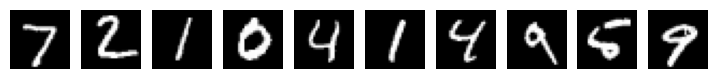

In [3]:
from matplotlib import pyplot as plt

n = 10
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

## Load the pretrained Model

In [7]:
from tensorflow import keras

pretrain_model = keras.models.load_model('initially_trained_autoencoder.h5')

## Load and test the new images:

In [8]:
# load 5 images with letter 'S'

pictures = []
for i in range(5):
    imgs = tf.keras.utils.load_img(f'i{i+1}.png', target_size=(28, 28), color_mode="grayscale")
    pictures.append(imgs)

## Predict (test the 5 sample images)

In [11]:
p_img = []
for imgs in pictures:
    in_pic = tf.keras.utils.img_to_array(imgs)
    in_pic = in_pic/255  # normalize between 0 and 1
    in_pic = in_pic.reshape(784)
    p_img.append(in_pic)

p_img = np.array(p_img)  # Convert images to a batch of images

predictions = pretrain_model.predict(p_img)
print(predictions.shape)


1/1 [==============================] - 0s 167ms/step
(5, 784)


## Display the predicted input and output images.

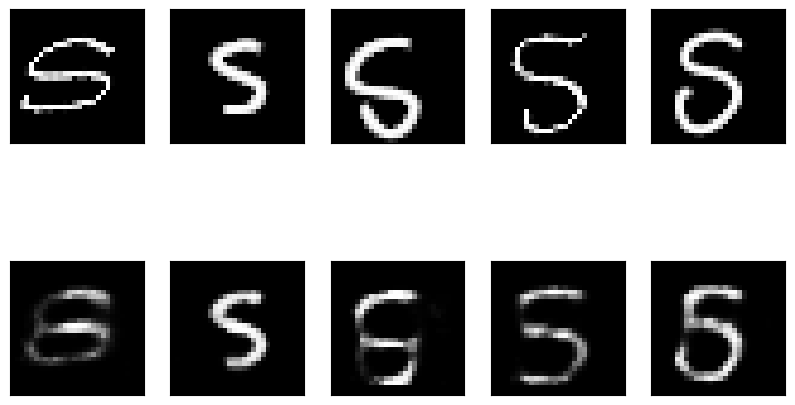

In [13]:

plt.figure(figsize=(10, 6))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(pictures[i], cmap="gray")
    
    plt.subplot(2, 5, i+6)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(predictions[i].reshape(28, 28), cmap="gray")

plt.show()

## Merge new images to train data

In [14]:
p_img = np.array(p_img)
und_images = np.repeat(p_img, 15, axis=0)#oversampling the data
new_images = np.vstack((train_images[:500], und_images))#ony 500 subset from the main dataset
np.random.shuffle(new_images)

In [15]:
new_images_train = new_images[int(len(new_images)*.8):]
new_images_test = new_images[int(len(new_images)*.2):]

from tensorflow import keras
updated_model = keras.models.load_model('initially_trained_autoencoder.h5')

In [17]:
# Train the autoencoder with updated data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = updated_model.fit(
    x=new_images_train, # For autoencoders, both the input and the target are the same
    y=new_images_train, 
    epochs=15, 
    batch_size=128,
    shuffle=True, 
    validation_data=(new_images_test, new_images_test),
    callbacks=[early_stop]
)

Epoch 1/15
1/1 [==============================] - 1s 849ms/step - loss: 0.0948 - val_loss: 0.0904
Epoch 2/15
1/1 [==============================] - 0s 73ms/step - loss: 0.0912 - val_loss: 0.0848
Epoch 3/15
1/1 [==============================] - 0s 78ms/step - loss: 0.0842 - val_loss: 0.0856
Epoch 4/15
1/1 [==============================] - 0s 73ms/step - loss: 0.0838 - val_loss: 0.0844
Epoch 5/15
1/1 [==============================] - 0s 74ms/step - loss: 0.0812 - val_loss: 0.0825
Epoch 6/15
1/1 [==============================] - 0s 74ms/step - loss: 0.0783 - val_loss: 0.0829
Epoch 7/15
1/1 [==============================] - 0s 82ms/step - loss: 0.0779 - val_loss: 0.0813
Epoch 8/15
1/1 [==============================] - 0s 79ms/step - loss: 0.0753 - val_loss: 0.0808
Epoch 9/15
1/1 [==============================] - 0s 74ms/step - loss: 0.0738 - val_loss: 0.0801
Epoch 10/15
1/1 [==============================] - 0s 73ms/step - loss: 0.0721 - val_loss: 0.0798
Epoch 11/15
1/1 [===========

## Testing the model on original test dataset

313/313 [==============================] - 1s 4ms/step


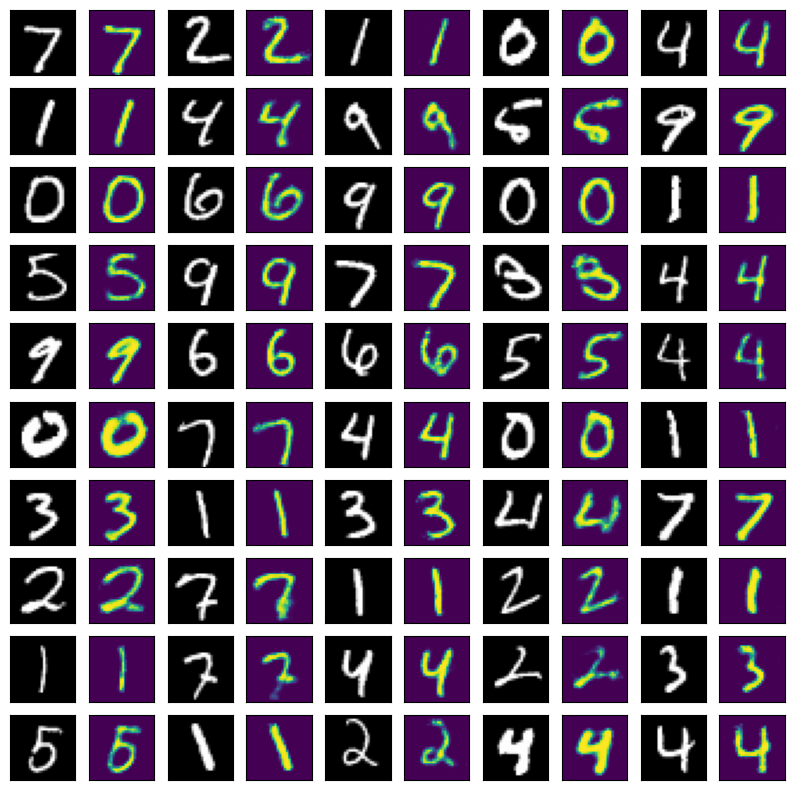

In [18]:
reconstructed_images = updated_model.predict(test_images)

pictures = []
for i in range(100):
    pictures.append(test_images[i].reshape(28,28))
    pictures.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(pictures[i],cmap='gray')
    else:
        plt.imshow(pictures[i])
plt.show()


## Testing tbe model on the new test data

In [24]:
# load 5 sample images

pictures = []
for i in range(5):
    path = f'i{i+1}.png'
    imgs = tf.keras.utils.load_img(path, target_size=(28, 28), color_mode = "grayscale")
    pictures.append(imgs)
    
# predict the images from this sample
p_img = []
for imgs in pictures:
    in_pic = tf.keras.utils.img_to_array(imgs)
    in_pic = in_pic/ 255 # normalize between 0 and 1
    in_pic = in_pic.reshape(784)
    p_img.append(in_pic)

p_img = np.array(p_img)
predictions = updated_model.predict(p_img)
print(predictions.shape)

1/1 [==============================] - 0s 29ms/step
(5, 784)


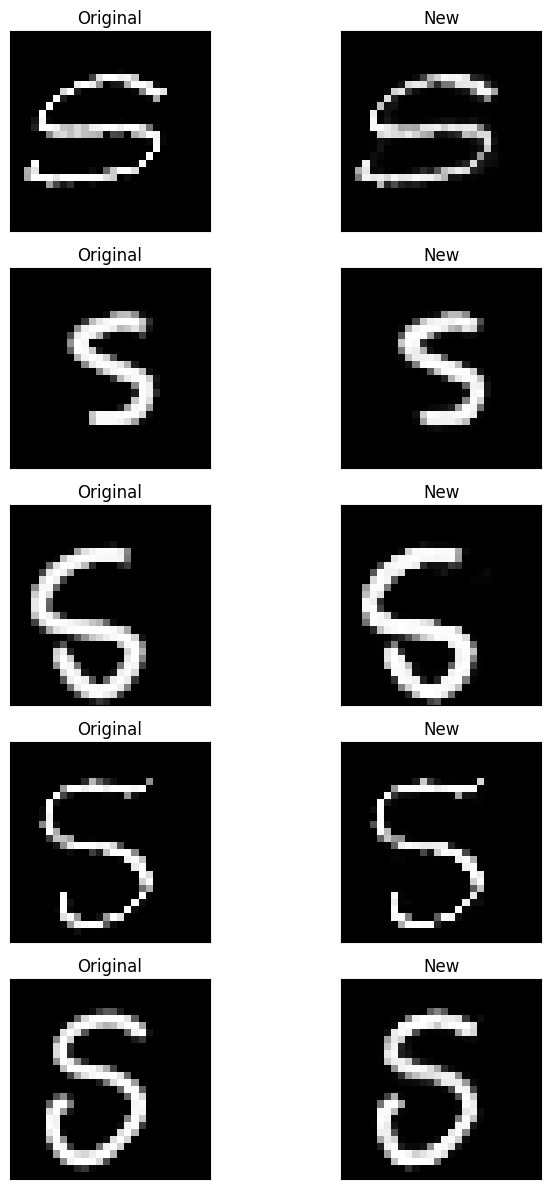

In [25]:
# display the images and their reconstructions side by side
rows = 5
cols = 2
fig, axs = plt.subplots(rows,cols,figsize=(8,12))

for i in range(rows):
    axs[i,0].imshow(pictures[i], cmap="gray")
    axs[i,0].set_xticks([])
    axs[i,0].set_yticks([])
    axs[i,0].set_title("Original")
    
    axs[i,1].imshow(predictions[i].reshape(28,28), cmap="gray")
    axs[i,1].set_xticks([])
    axs[i,1].set_yticks([])
    axs[i,1].set_title("New")

plt.tight_layout()
plt.show()

## Save the autoencoder.

In [26]:
updated_model.save('Srikar_autoencoder.h5')

### Summary:

> Firstly the letter 'S' with 5 different versions has been added  to the MNIST dataset. We oversampled the data and then predicted the model with the new data set (Includes different versions of 'S').From the above we can conclude that the Letter'S' that has been trained is well predicted by the autoencoder model.